<a href="https://colab.research.google.com/github/dudinkasg/Bootcamp_TurmaNoite/blob/main/final_16_03_24_maria_eduarda_gomes_projeto_redes_neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto - Aplicação de Redes Neurais**

Objetivo: O aluno deverá ser capaz de realizar uma análise completa dos dados e projetar uma rede neural para resolver o problema. Avaliar os resultados obtidos através das métricas de classificação
Problema: De posse de dados que correspondem a sinais de transitórios de eletrodomésticos (sinais obtidos em uma janela de 2s ao se ligar  equipamento) e que foram rotulados em 7 diferentes classes, o aluno deverá realizar os seguintes passos:  

1)	Carregar os dados e realizar a limpeza dos dados (se necessário).

2)	Visualizar os dados para compreensão (dica: plotar 1 exemplo de cada
Classe). Como na Figura 1 , abaixo, que representa um eletrodoméstico da Classe 1.

3)	Como é um problema muticlasse, o aluno deverá transformar os labels para uma representação correta.

4)	Preparar os dados para serem apresentados à ML.

5)	Construir a rede neural com seus respectivos parâmetros (taxa de aprendizado, número de camadas intermediárias, número de neurônios, batch_size etc). O aluno deve propor uma estratégia para determinar esses parâmetros.

6)	Testar e validar os resultados.

7)	Avaliar o uso de PCA (Análise de Componentes Principais) para visualização dos dados e também como speed-up da ML (para fins de classificação).

8) Conclusão
obs.:  Esses dados estão desatualizados, não necessariamente representam os eletrodomésticos atuais. Mas, esses estudos ainda são atuais e continuam usando recursos de IA em suas soluções.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importando as bibliotecas:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
 # Importando dados:
 url = '/content/drive/MyDrive/Infnet - Bootcamp/db.csv'

In [ ]:
# Lendo os dados com pandas:
df = pd.read_csv(url)

In [ ]:
df

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00,1
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,1
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.70,4.70,2.70,-0.30,0.70,0.70,2.70,1.70,1.70,0.70,...,-0.30,-0.30,-0.30,0.70,-0.30,0.70,-1.30,-1.30,-0.30,5
96,11.55,5.55,2.55,1.55,0.55,1.55,0.55,0.55,-0.45,0.55,...,0.55,-0.45,0.55,-1.45,0.55,-0.45,0.55,-0.45,0.55,6
97,14.35,4.35,1.35,2.35,-0.65,0.35,0.35,1.35,0.35,0.35,...,-0.65,0.35,-0.65,0.35,-1.65,0.35,0.35,0.35,-0.65,6
98,22.70,-5.30,-0.30,-5.30,-1.30,-3.30,-1.30,-3.30,-2.30,-3.30,...,-2.30,1.70,-1.30,1.70,-0.30,0.70,-2.30,0.70,-1.30,7


In [ ]:
#Verificando os dados:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 201 entries, t0 to Classes
dtypes: float64(200), int64(1)
memory usage: 157.2 KB


In [ ]:
# Avaliando o perfil geral dos dados
df.describe()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,11.114000,7.974000,8.154000,7.334000,7.374000,6.834000,7.134000,6.874000,7.054000,6.594000,...,0.114000,-0.14600,-0.146000,0.154000,0.014000,0.374000,-0.20600,-0.146000,-0.186000,3.140000
std,10.187807,9.012776,8.899937,8.958318,8.458134,8.301816,8.230796,8.317599,8.269182,7.937996,...,2.253057,0.86292,0.829497,1.009442,1.114779,0.969548,0.78757,1.046004,0.838411,1.608186
min,-10.150000,-6.300000,-6.300000,-6.300000,-5.300000,-3.500000,-4.300000,-6.300000,-6.300000,-4.300000,...,-2.500000,-2.40000,-2.050000,-2.500000,-2.150000,-2.500000,-2.30000,-2.500000,-2.050000,1.000000
25%,0.650000,0.450000,0.700000,0.450000,0.650000,0.450000,0.600000,0.850000,0.650000,0.650000,...,-0.700000,-0.75000,-0.700000,-0.550000,-0.800000,-0.100000,-0.70000,-0.750000,-0.700000,2.000000
50%,11.925000,5.575000,4.950000,4.300000,3.600000,3.050000,3.300000,3.325000,3.225000,3.850000,...,-0.300000,-0.07500,-0.200000,0.275000,-0.075000,0.400000,-0.32500,-0.025000,-0.275000,3.000000
75%,21.250000,14.900000,17.450000,16.950000,14.900000,13.000000,14.000000,13.000000,11.950000,10.950000,...,0.300000,0.45000,0.550000,0.700000,0.700000,0.850000,0.35000,0.450000,0.250000,4.000000
max,25.850000,25.450000,26.200000,25.200000,25.200000,25.000000,24.200000,25.200000,26.200000,25.200000,...,13.550000,1.70000,1.500000,2.650000,3.500000,3.800000,1.35000,1.850000,2.500000,7.000000


In [ ]:
# Verificando se tem duplicatas no Dataframe:
df[df.duplicated()]

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
29,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00,1
30,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1
32,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1
33,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,1
34,15.10,15.10,22.10,23.10,22.10,21.10,14.10,23.10,23.10,23.10,...,0.10,-0.90,1.10,-0.90,1.10,-0.90,1.10,-0.90,1.10,1
35,-2.50,-2.50,-3.50,-3.50,-3.50,-3.50,-2.50,2.50,11.50,9.50,...,-0.50,0.50,-0.50,0.50,-0.50,0.50,-0.50,0.50,-0.50,1
36,19.20,17.20,26.20,25.20,25.20,23.20,24.20,25.20,26.20,25.20,...,-0.80,0.20,-0.80,1.20,-0.80,0.20,-0.80,0.20,-0.80,1
37,15.90,14.90,22.90,24.90,24.90,22.90,22.90,21.90,24.90,22.90,...,-1.10,0.90,-0.10,0.90,-1.10,0.90,-0.10,0.90,-1.10,1
42,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,2
43,-0.35,-0.35,0.65,-0.35,0.65,-0.35,-0.35,-0.35,0.65,-0.35,...,-0.35,-0.35,-0.35,0.65,-0.35,0.65,-0.35,-0.35,-0.35,2


Apesar do dataset apresentar duplicatas, possivelmente são aparelhos com o mesmo padrão de gasto de energia ao ligar e por isso optei por mantê-las.

In [ ]:
# Verificando se existem valores nulos no dataset:
df.isna().sum()

t0         0
t1         0
t2         0
t3         0
t4         0
          ..
t196       0
t197       0
t198       0
t199       0
Classes    0
Length: 201, dtype: int64

In [ ]:
# Verificando quantas classes tem o dataset e quantas instâncias existem em cada classe:
df.groupby('Classes').size()

Classes
1    16
2    22
3    30
4     8
5    16
6     4
7     4
dtype: int64

Aparentemente algumas classes têm um número muito menor de amostras do que outra (4, 6 e 7 têm apenas 8, 4 e 4 amostras, respectivamente). Isso pode gerar um problema na classificação pelo meu modelo.

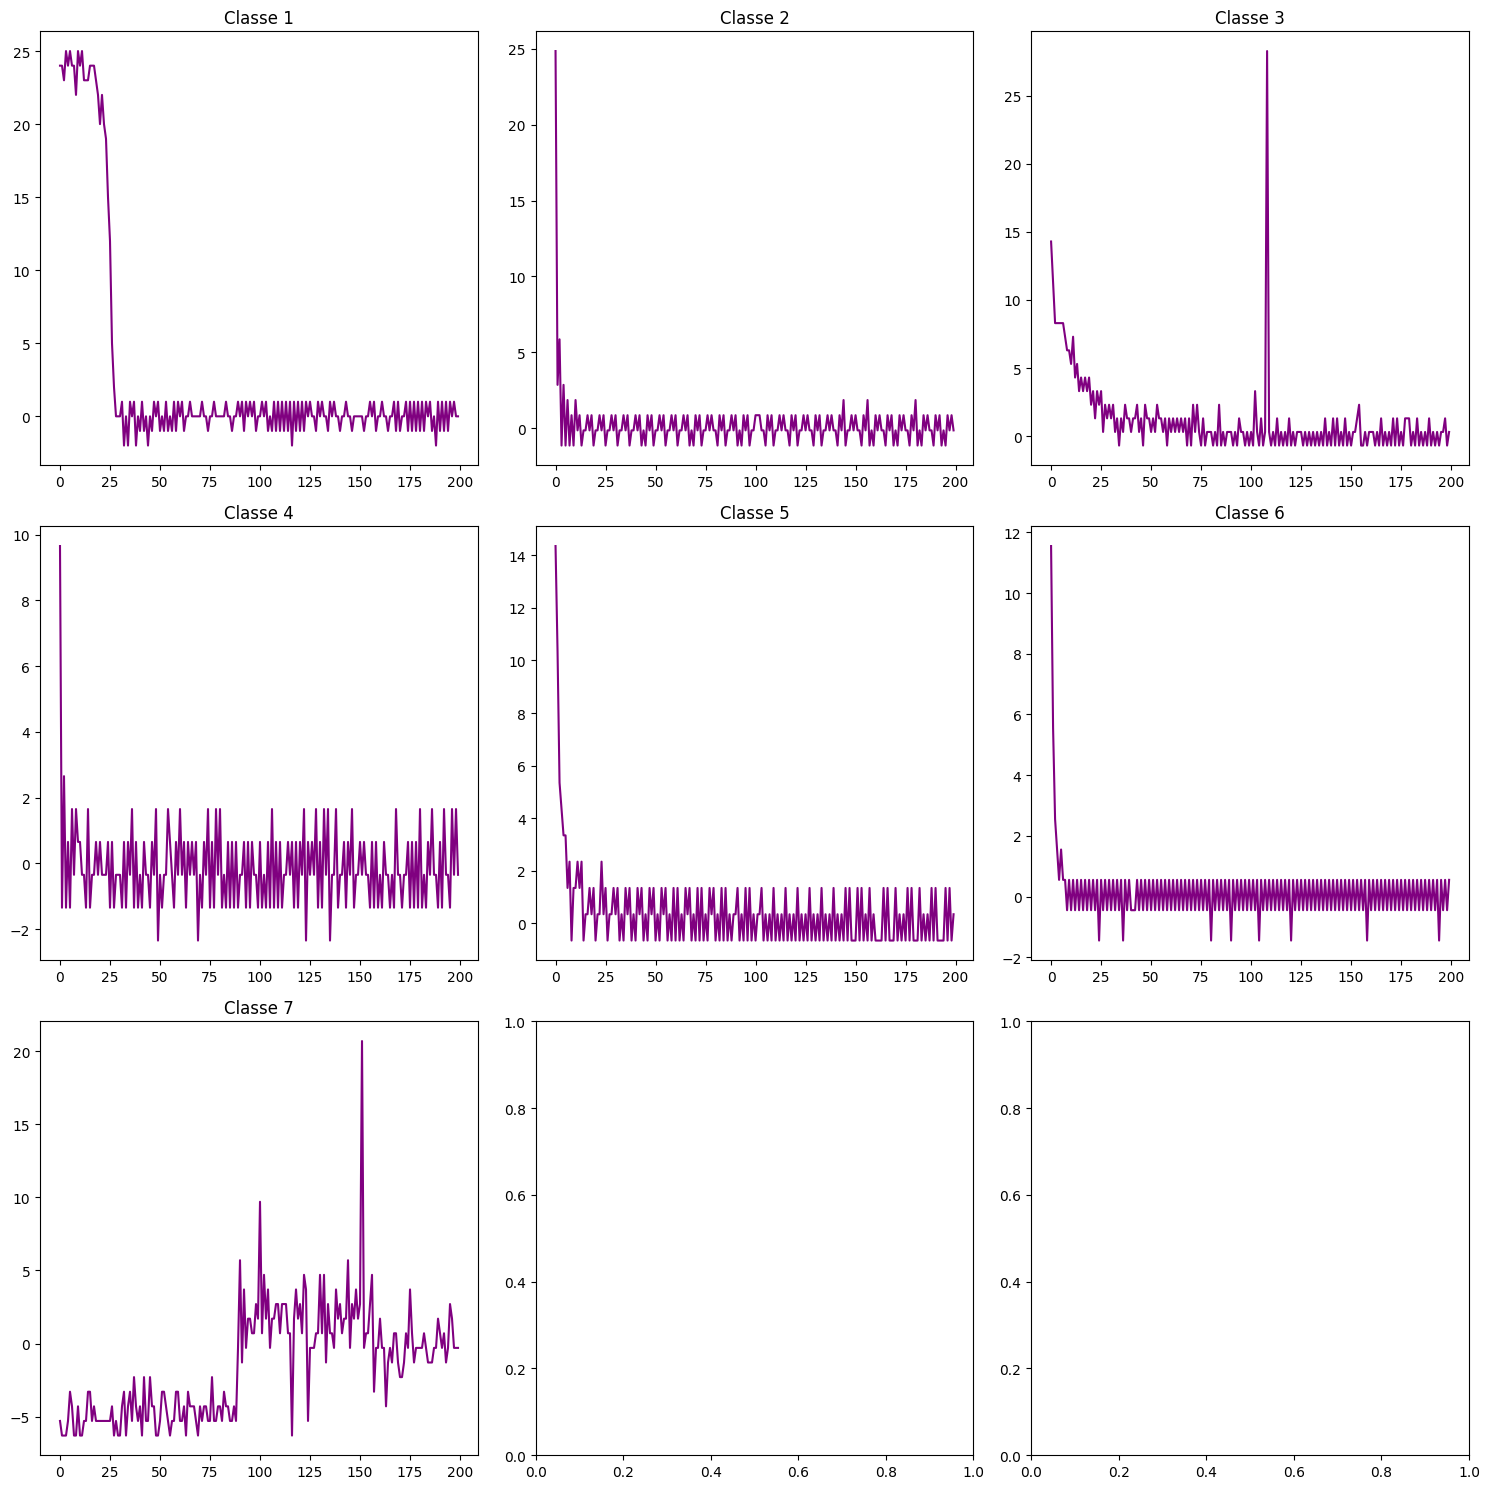

In [ ]:
# Plotando exemplos de cada classe em gráficos separados:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, ax in enumerate(axs.flat):
    classe = i + 1
    exemplos_classe = df[df['Classes'] == classe]
    if not exemplos_classe.empty:
        exemplo = exemplos_classe.iloc[0]
        ax.plot(exemplo.drop('Classes').values, color='purple')
        ax.set_title(f'Classe {classe}')

plt.tight_layout()
plt.show()

In [ ]:
df2 = df

In [ ]:
# Inicialize o codificador
onehot_encoder = OneHotEncoder(sparse=False)

# Ajuste e transforme os dados
categorias_codificadas = onehot_encoder.fit_transform(df2[['Classes']])

print(categorias_codificadas)

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Atribuindo as entradas à variavel X e a saída à variável y:
X = df2.drop('Classes', axis=1)########.values
y = categorias_codificadas

In [ ]:
# Separando o dataset em conjunto de treino e conjunto de teste:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=20)

In [ ]:
# Normalizando os dados com StandarScaler:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Treinando o classificador MLP:
clf = MLPClassifier(random_state=1,hidden_layer_sizes= (5,),learning_rate_init=0.01, max_iter=1000,
                    verbose=True).fit(X_train, y_train)

Iteration 1, loss = 5.37756854
Iteration 2, loss = 4.94897661
Iteration 3, loss = 4.64329869
Iteration 4, loss = 4.34067701
Iteration 5, loss = 4.06480541
Iteration 6, loss = 3.82602121
Iteration 7, loss = 3.61793320
Iteration 8, loss = 3.41288645
Iteration 9, loss = 3.21158076
Iteration 10, loss = 3.01628985
Iteration 11, loss = 2.83369129
Iteration 12, loss = 2.67773185
Iteration 13, loss = 2.54345195
Iteration 14, loss = 2.42056408
Iteration 15, loss = 2.31145952
Iteration 16, loss = 2.21733760
Iteration 17, loss = 2.13382604
Iteration 18, loss = 2.05869445
Iteration 19, loss = 1.98898568
Iteration 20, loss = 1.92775683
Iteration 21, loss = 1.86975188
Iteration 22, loss = 1.81469981
Iteration 23, loss = 1.76273283
Iteration 24, loss = 1.71425517
Iteration 25, loss = 1.66867336
Iteration 26, loss = 1.62510007
Iteration 27, loss = 1.58256570
Iteration 28, loss = 1.54055794
Iteration 29, loss = 1.50017714
Iteration 30, loss = 1.46003999
Iteration 31, loss = 1.42201639
Iteration 32, los

In [ ]:
# Verificando qual a acurácia da clasificação do modelo no conjunto de treino.
clf.score(X_train,y_train)

0.925

In [ ]:
# Prevendo as saídas para os dados de teste e calculando a acurácia do modelo nos dados de teste:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy}')

Acurácia no conjunto de teste: 0.8


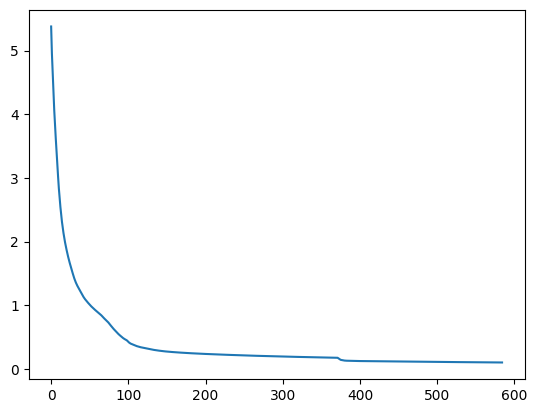

In [ ]:
# Exibindo o gráfico da curva de perda durante o treinamento:
plt.plot(clf.loss_curve_)
plt.show()


Uma acurácia de 92.5% no conjunto de treinamento é considerada alta e geralmente indica que o modelo está se ajustando bem aos dados de treinamento. No entanto, a diferença entre a acurácia no conjunto de treinamento (92.5%) e no conjunto de teste (80%) sugere que pode haver algum grau de overfitting. Por isso, ajustarei os hiperparâmetros do modelo para ajudar a encontrar um equilíbrio melhor entre bias e variância, o que pode resultar em um modelo com melhor capacidade de generalização. Também pode ser interessante implementar técnicas adicionais para lidar com o overfitting.

In [ ]:
# Defininindo os parâmetros que serão ajustados pelo GridSearch:
parameters = {
    'hidden_layer_sizes': [(50,),(100,),(150,)],  # Número de neurônios em cada camada oculta
    'activation': ['relu', 'tanh', 'logistic'],   # Função de ativação
    'alpha': [0.0001, 0.001, 0.01],               # Parâmetro de regularização
}

# Instanciando o GridSearch:
grid_search = GridSearchCV(clf, parameters, cv=5, n_jobs=-1)

# Ajustando a busca aos dados:
grid_search.fit(X_train, y_train)

Iteration 1, loss = 6.26763218
Iteration 2, loss = 2.60960103
Iteration 3, loss = 1.52464308
Iteration 4, loss = 1.09257650
Iteration 5, loss = 0.87709147
Iteration 6, loss = 0.69516675
Iteration 7, loss = 0.53519323
Iteration 8, loss = 0.41056428
Iteration 9, loss = 0.31772059
Iteration 10, loss = 0.24897617
Iteration 11, loss = 0.19459982
Iteration 12, loss = 0.15284619
Iteration 13, loss = 0.12076241
Iteration 14, loss = 0.09614715
Iteration 15, loss = 0.07802975
Iteration 16, loss = 0.06457755
Iteration 17, loss = 0.05374312
Iteration 18, loss = 0.04455076
Iteration 19, loss = 0.03654969
Iteration 20, loss = 0.02994316
Iteration 21, loss = 0.02474754
Iteration 22, loss = 0.02081792
Iteration 23, loss = 0.01790786
Iteration 24, loss = 0.01563249
Iteration 25, loss = 0.01373268
Iteration 26, loss = 0.01209852
Iteration 27, loss = 0.01067472
Iteration 28, loss = 0.00942910
Iteration 29, loss = 0.00836765
Iteration 30, loss = 0.00748044
Iteration 31, loss = 0.00673886
Iteration 32, los

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(5,),
                                     learning_rate_init=0.01, max_iter=1000,
                                     random_state=1, verbose=True),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (150,)]})

In [ ]:
# Mostrando os melhores parâmetros obtidos pelo GridSearch:
print("Melhores parâmetros:", grid_search.best_params_)

Melhores parâmetros: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150,)}


In [ ]:
# Avaliando o desempenho do modelo com os melhores parâmetros obtidos pelo GridSearch:
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Acurácia do modelo com os melhores parâmetros:", accuracy)

Acurácia do modelo com os melhores parâmetros: 0.9


 O desempenho do modelo utilizando os parâmetros obtidos pelo GridSearch aumentram a acurácia da classfiicação de 0,8 para 0,9 (12,5%).



Uma acurácia de 90% nos dados de teste é um resultado muito bom! Isso sugere que o modelo está generalizando bem para dados não vistos, o que é o objetivo principal da modelagem de machine learning.

Agora, com uma acurácia de 90%, você tem uma boa confiança de que o seu modelo está fazendo previsões precisas sobre os sinais de transição de eletrodomésticos. No entanto, continue monitorando e refinando o modelo conforme necessário, especialmente se houver mudanças nos dados ou nos requisitos do problema.

In [ ]:
# Calculando as métricas de qualidade:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         7
           3       0.00      0.00      0.00         0
           4       0.80      1.00      0.89         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0

   micro avg       0.86      0.95      0.90        20
   macro avg       0.54      0.57      0.56        20
weighted avg       0.91      0.95      0.93        20
 samples avg       0.88      0.95      0.90        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Com base nas métricas, parece que o modelo está apresentando um desempenho muito bom para as classes 0, 1 e 2, com precisão e recall de 1.00. No entanto, para as classes  3, 5 e 6, o desempenho é muito ruim, com precisão e recall de 0.00. Isso sugere que o modelo pode estar tendo dificuldades em distinguir entre essas classes específicas.

In [ ]:
# Calculando a matriz de confusão:
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[3 0 0 0 0]
 [0 5 0 0 0]
 [0 0 7 0 0]
 [0 0 0 4 0]
 [1 0 0 0 0]]


A matriz de confusão parece se referir apenas a 5 categorias, enquanto deveria refletir as 7 categorias do seu conjunto de dados. No entanto, não há menção de categorias 5 e 6 nesta matriz de confusão, sugerindo que o modelo não fez nenhuma previsão para essas categorias. Isso indica que a matriz de confusão está incompleta e não reflete todas as categorias do conjunto de dados.

In [ ]:
from collections import Counter

# Convertendo array NumPy em lista:
y_train_list = y_train.tolist()

# Convertendo listas em tuplas:
y_train_tuples = tuple(tuple(row) for row in y_train_list)

# Verificando a distribuição das classes antes do balanceamento:
print("Contagem de classes antes do balanceamento:", Counter(y_train_tuples))

# Convertendo listas resampledas em tuplas:
X_train_array = np.array(X_train)
y_train_array = np.array(y_train_list)

# Encontrando a classe menos representada:
classes, counts = np.unique(y_train_array, axis=0, return_counts=True)
classe_menos_representada = classes[np.argmin(counts)]

# Determiando o número de duplicações necessárias:
num_duplicacoes = max(counts) - counts.min()

# Encontrando os índices das amostras na classe menos representada:
indices_classe_menos_representada = np.where((y_train_array == classe_menos_representada).all(axis=1))[0]

# Duplicando aleatoriamente as amostras na classe menos representada:
indices_duplicados = np.random.choice(indices_classe_menos_representada, size=num_duplicacoes, replace=True)
X_train_duplicado = np.concatenate([X_train_array, X_train_array[indices_duplicados]])
y_train_duplicado = np.concatenate([y_train_array, y_train_array[indices_duplicados]])

# Convertendo listas resampledas em tuplas:
y_train_duplicado_tuples = tuple(tuple(row) for row in y_train_duplicado)

# Verificando a distribuição das classes após o balanceamento:
print("Contagem de classes após o balanceamento:", Counter(y_train_duplicado_tuples))

Contagem de classes antes do balanceamento: Counter({(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0): 23, (0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0): 17, (1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0): 13, (0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0): 12, (0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0): 8, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0): 4, (0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0): 3})
Contagem de classes após o balanceamento: Counter({(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0): 23, (0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0): 23, (0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0): 17, (1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0): 13, (0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0): 12, (0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0): 8, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0): 4})


In [ ]:
# Separando o conjunto de dados balanceado em conjuntos de treinamento e teste:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_train_duplicado, y_train_duplicado, test_size=0.2, random_state=42)

# Normalizando os dados com StandardScaler:
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_balanced_scaled = scaler.transform(X_test_balanced)

# Treinando o classificador MLPClassifier:
clf_balanced = MLPClassifier(random_state=1, hidden_layer_sizes=(100,), max_iter=1000, verbose=True)
clf_balanced.fit(X_train_balanced_scaled, y_train_balanced)

Iteration 1, loss = 6.05290900
Iteration 2, loss = 5.47472119
Iteration 3, loss = 4.95837477
Iteration 4, loss = 4.50352372
Iteration 5, loss = 4.11052738
Iteration 6, loss = 3.77137170
Iteration 7, loss = 3.47880357
Iteration 8, loss = 3.21972915
Iteration 9, loss = 2.98835267
Iteration 10, loss = 2.78112896
Iteration 11, loss = 2.59602175
Iteration 12, loss = 2.43025962
Iteration 13, loss = 2.27985744
Iteration 14, loss = 2.14313347
Iteration 15, loss = 2.01845885
Iteration 16, loss = 1.90475234
Iteration 17, loss = 1.80111666
Iteration 18, loss = 1.70685537
Iteration 19, loss = 1.62128491
Iteration 20, loss = 1.54300556
Iteration 21, loss = 1.47166820
Iteration 22, loss = 1.40599101
Iteration 23, loss = 1.34540828
Iteration 24, loss = 1.28935252
Iteration 25, loss = 1.23714204
Iteration 26, loss = 1.18821083
Iteration 27, loss = 1.14215553
Iteration 28, loss = 1.09870303
Iteration 29, loss = 1.05745327
Iteration 30, loss = 1.01851477
Iteration 31, loss = 0.98149279
Iteration 32, los

MLPClassifier(max_iter=1000, random_state=1, verbose=True)

In [ ]:
# Verificando qual a acurácia da clasificação do modelo no conjunto de treino.
clf.score(X_train_balanced,y_train_balanced)

0.725

In [ ]:
# # Prevendo as saídas para os dados de teste e calculando a acurácia do modelo nos dados de teste:
y_pred_balanced = clf_balanced.predict(X_test_balanced_scaled)
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
print("Acurácia do modelo com dados balanceados:", accuracy_balanced)

Acurácia do modelo com dados balanceados: 0.95


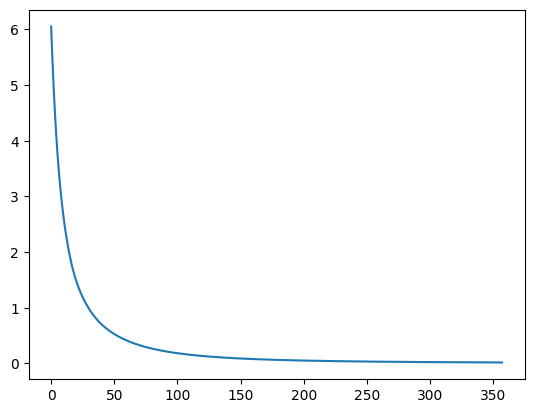

In [ ]:
# Exibindo o gráfico da curva de perda durante o treinamento:
plt.plot(clf_balanced.loss_curve_)
plt.show()

In [ ]:
# Defininindo os parâmetros que serão ajustados pelo GridSearch:
parameters = {
    'hidden_layer_sizes': [(50,),(100,),(150,)],  # Número de neurônios em cada camada oculta
    'activation': ['relu', 'tanh', 'logistic'],   # Função de ativação
    'alpha': [0.0001, 0.001, 0.01],               # Parâmetro de regularização
}

# Instanciando o GridSearch:
grid_search_balanced = GridSearchCV(clf_balanced, parameters, cv=5, n_jobs=-1)

# Ajustando a busca aos dados:
grid_search_balanced.fit(X_train_balanced_scaled, y_train_balanced)

Iteration 1, loss = 6.05290900
Iteration 2, loss = 5.47472119
Iteration 3, loss = 4.95837477
Iteration 4, loss = 4.50352372
Iteration 5, loss = 4.11052738
Iteration 6, loss = 3.77137170
Iteration 7, loss = 3.47880357
Iteration 8, loss = 3.21972915
Iteration 9, loss = 2.98835267
Iteration 10, loss = 2.78112896
Iteration 11, loss = 2.59602175
Iteration 12, loss = 2.43025962
Iteration 13, loss = 2.27985744
Iteration 14, loss = 2.14313347
Iteration 15, loss = 2.01845885
Iteration 16, loss = 1.90475234
Iteration 17, loss = 1.80111666
Iteration 18, loss = 1.70685537
Iteration 19, loss = 1.62128491
Iteration 20, loss = 1.54300556
Iteration 21, loss = 1.47166820
Iteration 22, loss = 1.40599101
Iteration 23, loss = 1.34540828
Iteration 24, loss = 1.28935252
Iteration 25, loss = 1.23714204
Iteration 26, loss = 1.18821083
Iteration 27, loss = 1.14215553
Iteration 28, loss = 1.09870303
Iteration 29, loss = 1.05745327
Iteration 30, loss = 1.01851477
Iteration 31, loss = 0.98149279
Iteration 32, los

GridSearchCV(cv=5,
             estimator=MLPClassifier(max_iter=1000, random_state=1,
                                     verbose=True),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (150,)]})

In [ ]:
# Mostrando os melhores parâmetros obtidos pelo GridSearch:
print("Melhores parâmetros:", grid_search_balanced.best_params_)

Melhores parâmetros: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}


In [ ]:
# Prevendo as saídas para os dados de teste com o melhor modelo:
best_model_balanced = grid_search_balanced.best_estimator_
y_pred_best = best_model.predict(X_test_balanced_scaled)

In [ ]:
# Avaliando o desempenho do modelo com os melhores parâmetros obtidos pelo GridSearch:
best_model_balanced = grid_search_balanced.best_estimator_
accuracy = best_model_balanced.score(X_test_balanced, y_test_balanced)
print("Acurácia do modelo com os melhores parâmetros:", accuracy)

Acurácia do modelo com os melhores parâmetros: 0.95


In [ ]:
# Convertendo as previsões de volta para rótulos unidimensionais:
y_pred_labels = np.argmax(y_pred_best, axis=1)
y_test_labels = np.argmax(y_test_balanced, axis=1)

# Calculando a matriz de confusão:
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[3 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 5 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 4 0]
 [0 0 0 0 0 0 1]]


A matriz de confusão parece mostrar um desempenho adequado às classes do dataset e um bom resultado do modelo, com a maioria das instâncias sendo classificadas corretamente para suas respectivas classes. Considerando o valores de acurárcia para treino e teste (ambos 95%) do modelo otimizado, após a apkicação dos parâmetros obtidos pelo GridSearch, o modelo pode ser considerado adequado.

In [ ]:
# Inicializando o PCA para redução de dimensionalidade (com 2 dimensões):
pca = PCA(n_components=2)

# Aplicar PCA aos dados de treinamento e teste
X_train_pca = pca.fit_transform(X_train_balanced)
X_test_pca = pca.transform(X_test_balanced)

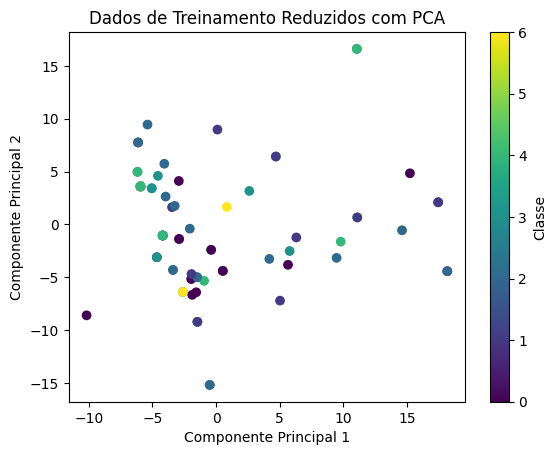

In [ ]:
# Visualizando os dados reduzidos em um gráfico de dispersão:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train.argmax(axis=1), cmap='viridis')
plt.colorbar(label='Classe')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Dados de Treinamento Reduzidos com PCA')
plt.show()

In [ ]:
# Treinando e avaliando o modelo de classificação com PCA:
clf_com_pca = MLPClassifier(random_state=1, hidden_layer_sizes=(5,), learning_rate_init=0.01, max_iter=1000)
clf_com_pca.fit(X_train_pca, y_train_balanced)
accuracy_com_pca = clf_com_pca.score(X_test_pca, y_test_balanced)
print("Acurácia do modelo com PCA:", accuracy_com_pca)

Acurácia do modelo com PCA: 0.3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


A aplicação do método de redução de dimensionalidade PCA (Análise de Componentes Principais) resultou em uma queda significativa na acurácia do modelo (0,3 x 0,95). Isso pode ser devido à redução da dimensionalidade dos dados para apenas duas dimensões, que pode ter retirado informações importantes para a classificação adequada pelo modelo.

 Logo, o melhor modelo de classificação obtido nesta análise foi a rede neural MLPClassifier, utilizando os parâmetros otimizados pelo GridSearch, após o balanceamento das classes, que que obteve uma acurácia de 0,95.